In [2]:
#import pandas
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#read in listing data for different cities
austin_df = pd.read_csv(r'/Users/nolanstephenson/DTSC_courses/691/Austin BnB Data/listings.csv')
boston_df = pd.read_csv(r'/Users/nolanstephenson/DTSC_courses/691/boston_listings.csv')
chicago_df = pd.read_csv(r'/Users/nolanstephenson/DTSC_courses/691/chicago_listings.csv')
denver_df = pd.read_csv(r'/Users/nolanstephenson/DTSC_courses/691/denver_listings.csv')
nashville_df = pd.read_csv(r'/Users/nolanstephenson/DTSC_courses/691/Nashville_listings.csv')
portland_df = pd.read_csv(r'/Users/nolanstephenson/DTSC_courses/691/portland_listings.csv')
sandiego_df = pd.read_csv(r'/Users/nolanstephenson/DTSC_courses/691/sandiego_listings.csv')
asheville_df = pd.read_csv(r'/Users/nolanstephenson/DTSC_courses/691/asheville_listings.csv')
seattle_df = pd.read_csv(r'/Users/nolanstephenson/DTSC_courses/691/seattle_listings.csv')
nyc_df = pd.read_csv(r'/Users/nolanstephenson/DTSC_courses/691/nyc_listings.csv')
neworleans_df = pd.read_csv(r'/Users/nolanstephenson/DTSC_courses/691/neworleans_listings.csv')
la_df = pd.read_csv(r'/Users/nolanstephenson/DTSC_courses/691/la_listings.csv')
dallas_df = pd.read_csv(r'/Users/nolanstephenson/DTSC_courses/691/dallas_listings.csv')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#look at number of rows and columns of each
(austin_df.shape, boston_df.shape, chicago_df.shape, denver_df.shape, nashville_df.shape, portland_df.shape, 
 sandiego_df.shape, asheville_df.shape, seattle_df.shape, nyc_df.shape, neworleans_df.shape, 
 la_df.shape, dallas_df.shape)

((11972, 74),
 (3462, 74),
 (6535, 74),
 (4512, 74),
 (6799, 74),
 (3991, 74),
 (10935, 74),
 (2714, 74),
 (4883, 74),
 (37631, 74),
 (5489, 74),
 (33629, 74),
 (5428, 74))

# DATA CLEANING

In [5]:
austin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11972 entries, 0 to 11971
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11972 non-null  int64  
 1   listing_url                                   11972 non-null  object 
 2   scrape_id                                     11972 non-null  int64  
 3   last_scraped                                  11972 non-null  object 
 4   name                                          11972 non-null  object 
 5   description                                   11808 non-null  object 
 6   neighborhood_overview                         7059 non-null   object 
 7   picture_url                                   11971 non-null  object 
 8   host_id                                       11972 non-null  int64  
 9   host_url                                      11972 non-null 

In [6]:
#append each df onto one another to create a master DataFrame
df = pd.concat([austin_df, boston_df, chicago_df, denver_df, nashville_df, portland_df, sandiego_df,
               asheville_df, seattle_df, nyc_df, neworleans_df, 
                la_df, dallas_df])
df.shape

(137980, 74)

In [7]:
## Here is a brief overview of what I'll be doing with cleaning data ##

#drop $ from night price
#adjust bedrooms and beds columns
#length of description
#host age
#bathroom text parsing
#city parsing
#true/false columns (1's and 0's) --> superhost, profile_pic, identity_verified, instant_book
#remove unecessary columns and rows (number_of_reviews == 0, host_response_time isna, etc.)                                  

#### New Nightly Price Column

In [8]:
#create new nightly price column and drop old column with '$'
df['nightly_price'] = df['price'].apply(lambda x: x.replace('$',''))
df = df.drop('price', axis = 1)

In [9]:
df['nightly_price'] = df['nightly_price'].apply(lambda x: x.split('.')[0])
df['nightly_price'] = df['nightly_price'].apply(lambda x: x.replace(',',''))
df['nightly_price'] = df['nightly_price'].astype(int)

#### drop na in 'bedrooms' column

In [10]:
#remove na rows for colums'bedrooms' as this will be important to the model
df = df.dropna(subset=['bedrooms'])

In [11]:
df['beds'].value_counts()

1.0      55449
2.0      31821
3.0      16098
4.0       9035
5.0       4370
6.0       2655
7.0       1345
8.0        984
9.0        488
10.0       388
11.0       210
12.0       191
14.0       105
13.0       105
16.0        91
15.0        47
18.0        31
20.0        23
22.0        17
17.0        15
19.0        11
24.0        11
21.0         9
26.0         9
23.0         5
25.0         4
36.0         4
30.0         4
27.0         3
28.0         3
32.0         3
29.0         2
56.0         1
50.0         1
40.0         1
132.0        1
31.0         1
33.0         1
70.0         1
61.0         1
39.0         1
42.0         1
Name: beds, dtype: int64

In [12]:
#I will drop rows where beds are greater than 30 as these datapoints may skew the data
df = df[df['beds']<30]

#### Description Length

In [13]:
#create new 'desc' column as string type and then drop any missing values of 'desc' column
df['desc'] = df['description'].astype('string')
df = df.dropna(subset=['desc'])

In [14]:
#remove unwanted character from 'description'
df['desc'] = df['desc'].apply(lambda x: x.replace('<br />', "").replace('<b>', '')
                                           .replace('</b>', ''))

In [15]:
#create new column with listing description length
df['desc_len'] = df['desc'].apply(lambda x: len(x))
df['desc_len'].head(3)

#drop 'desc' column as it is not needed
df = df.drop('desc', axis=1)

#### Host Age Column

In [16]:
#drop na in 'host_since' column
df = df.dropna(subset=['host_since'])

# #create new columns for years of being a host
df['years_host'] = df['host_since'].apply(lambda x: x.split('-')[0])
df['years_host']

#change dtype to integer
df['years_host'] = df['years_host'].astype(int)

# #calculate years of being a host
df['years_host'] = df['years_host'].apply(lambda x: 2022 - x)

#### Bathroom parsing to remove text and create a new column of just integers for number of baths

In [17]:
df['bathrooms_text'] = df['bathrooms_text'].astype(str)

df['bath_count'] = df['bathrooms_text'].apply(lambda x: x.replace('private','')
                                                           .replace('bath','').replace('baths', '')
                                                           .replace('shared', '').replace('s', '')
                                                           .replace('Half-', '').replace('Private half-','')
                                                           .replace('Shared half-', ''))

df['bath_count'] = df['bath_count'].apply(lambda x: x.strip(' '))

In [18]:
#It appears that there is 'nan' values in 10 rows so I will remove those as well as empty value
df = df[df['bath_count']!='nan']
df = df[df['bath_count']!='']

In [19]:
#change dtype to float
df['bath_count'] = df['bath_count'].astype(float)

#### Parse out city name

In [20]:
#change dtype of host location into string so we can parse it
df['host_location'] = df['host_location'].astype(str)

In [21]:
#I will make sure all the results have the city names we are desiring
df['city'] = df['host_location'].apply(lambda x: x.split(',')[0])
# df['state'] = df['neighbourhood'].apply(lambda x: x.split(',')[1])

#### Handle true/false columns (host_is_superhost, profile_pic, identity_verified, instant_book

In [22]:
df['host_is_superhost'].value_counts()

f    78509
t    42620
Name: host_is_superhost, dtype: int64

In [23]:
#I will forgo the use of this column as the falses are only 1% of the data
df['host_has_profile_pic'].value_counts()

t    120175
f       954
Name: host_has_profile_pic, dtype: int64

In [24]:
df['host_identity_verified'].value_counts()

t    101910
f     19219
Name: host_identity_verified, dtype: int64

In [25]:
df['instant_bookable'].value_counts()

f    75653
t    45476
Name: instant_bookable, dtype: int64

In [26]:
#need to change these dtypes into strings
df['host_is_superhost'] = df['host_is_superhost'].astype(str)

In [27]:
#I will now create new columns based on the above true of false data
df['superhost_tf'] = df['host_is_superhost'].apply(lambda x: 1 if 't' in x.lower() else 0)
df['id_verified_tf'] = df['host_identity_verified'].apply(lambda x: 1 if 't' in x.lower() else 0)
df['instant_book_tf'] = df['instant_bookable'].apply(lambda x: 1 if 't' in x.lower() else 0)

#### Remove unnecessary columns or where NA's are present

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121129 entries, 0 to 5427
Data columns (total 81 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            121129 non-null  int64  
 1   listing_url                                   121129 non-null  object 
 2   scrape_id                                     121129 non-null  int64  
 3   last_scraped                                  121129 non-null  object 
 4   name                                          121118 non-null  object 
 5   description                                   121129 non-null  object 
 6   neighborhood_overview                         79628 non-null   object 
 7   picture_url                                   121128 non-null  object 
 8   host_id                                       121129 non-null  int64  
 9   host_url                                      1211

In [29]:
#drop any/all unneeded columns
df = df.drop(['id', 'description', 'listing_url', 'scrape_id', 'last_scraped', 'name',
             'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
              'host_name', 'host_since', 'host_location', 'host_about', 'host_is_superhost',
              'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
              'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 
              'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 
              'neighbourhood_group_cleansed', 'property_type', 'bathrooms', 
              'bathrooms_text', 'amenities', 'minimum_minimum_nights', 'maximum_minimum_nights',
              'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm', 
              'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 
              'availability_365', 'calendar_last_scraped',
              'first_review', 'last_review', 'license', 'instant_bookable', 
              'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
              'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'
             ], axis=1)

In [30]:
df.head(1)

,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,room_type,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,nightly_price,desc_len,years_host,bath_count,city,superhost_tf,id_verified_tf,instant_book_tf
0,within an hour,100%,94%,1.0,30.26057,-97.73441,Entire home/apt,3,1.0,2.0,2,90,7,18,44,585,42,5,4.83,4.87,4.85,4.89,4.81,4.73,4.78,3.69,240,933,13,1.0,Austin,1,1,0


In [31]:
#I will drop any na values from columns I am keeping for the model
#drop na's from categorical columns
df = df.dropna(subset=['host_response_time'])
df = df.dropna(subset=['host_acceptance_rate'])
df = df.dropna(subset=['host_response_rate'])
df = df.dropna(subset=['room_type'])

In [32]:
#I will remove any NA values from 'reviews_per_month' as these are irrelevant data points
df = df.dropna(subset=['reviews_per_month'])
#drop na's from review_scores_value
df = df.dropna(subset=['review_scores_communication'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76904 entries, 0 to 5427
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           76904 non-null  object 
 1   host_response_rate           76904 non-null  object 
 2   host_acceptance_rate         76904 non-null  object 
 3   host_listings_count          76904 non-null  float64
 4   latitude                     76904 non-null  float64
 5   longitude                    76904 non-null  float64
 6   room_type                    76904 non-null  object 
 7   accommodates                 76904 non-null  int64  
 8   bedrooms                     76904 non-null  float64
 9   beds                         76904 non-null  float64
 10  minimum_nights               76904 non-null  int64  
 11  maximum_nights               76904 non-null  int64  
 12  availability_30              76904 non-null  int64  
 13  availability_60  

#### Drop any rows where values are irrelevant 
#### Drop Reviews in the last 12 months equal to 0 
#### Drop reviews_per_month > 30

In [34]:
df['number_of_reviews_ltm'][df['number_of_reviews_ltm']==0].count()

7559

In [35]:
df = df[df['number_of_reviews_ltm']!=0]

In [36]:
df['number_of_reviews_ltm'][df['number_of_reviews_ltm']==0].count()

0

In [37]:
df.shape

(69345, 34)

In [38]:
df = df[df['reviews_per_month']<30]

In [39]:
df = df[df['nightly_price']<350]

In [40]:
df = df[df['minimum_nights']<40]

# Exploratory Data Analysis

In [41]:
#histogram
#boxplots
#correlation heatmap
#pivot tables
#bar graphs

In [42]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [43]:
df.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'nightly_price', 'desc_len',
       'years_host', 'bath_count', 'city', 'superhost_tf', 'id_verified_tf',
       'instant_book_tf'],
      dtype='object')

In [44]:
#Create numerical and categorical dataframes
df_cat = df.select_dtypes(exclude='number')
df_num = df.select_dtypes(include='number')

#### Firstly I will look at some histograms to get an idea of data distribution

In [45]:
df_num.shape

(58703, 29)

In [46]:
df_num[df_num['maximum_nights']>100].count()

host_listings_count            37819
latitude                       37819
longitude                      37819
accommodates                   37819
bedrooms                       37819
beds                           37819
minimum_nights                 37819
maximum_nights                 37819
availability_30                37819
availability_60                37819
availability_90                37819
number_of_reviews              37819
number_of_reviews_ltm          37819
number_of_reviews_l30d         37819
review_scores_rating           37819
review_scores_accuracy         37819
review_scores_cleanliness      37819
review_scores_checkin          37819
review_scores_communication    37819
review_scores_location         37819
review_scores_value            37819
reviews_per_month              37819
nightly_price                  37819
desc_len                       37819
years_host                     37819
bath_count                     37819
superhost_tf                   37819
i

<function matplotlib.pyplot.show(close=None, block=None)>

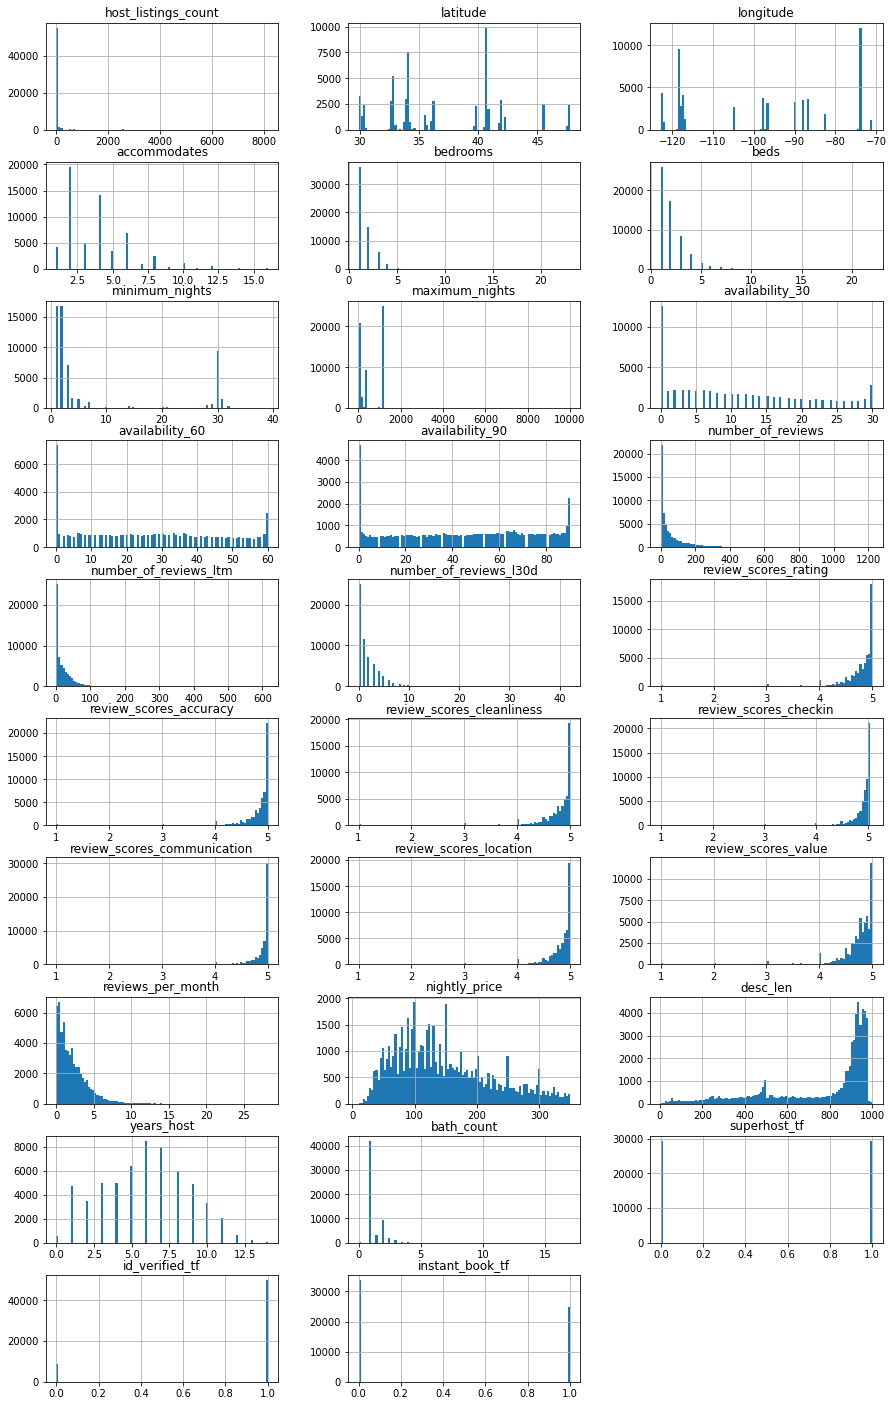

In [47]:
#create histogram of numerical features
df_num.hist(bins=100, figsize=(15, 25), layout=(-1, 3))
plt.show

array([[<AxesSubplot:title={'center':'maximum_nights'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>]], dtype=object)

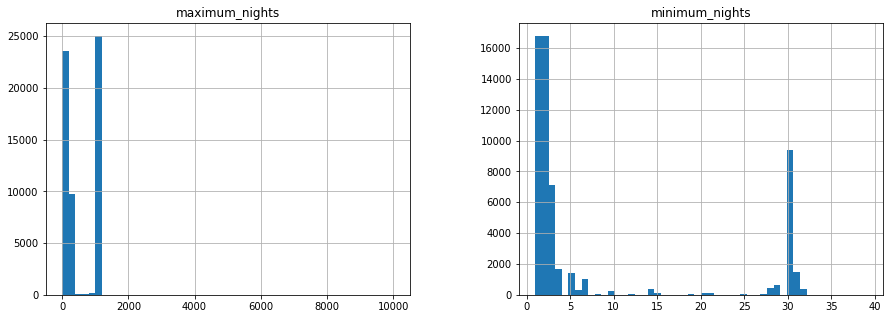

In [48]:
df_num.hist(column=['maximum_nights', 'minimum_nights'], bins=50, figsize=(15, 5))

<AxesSubplot:>

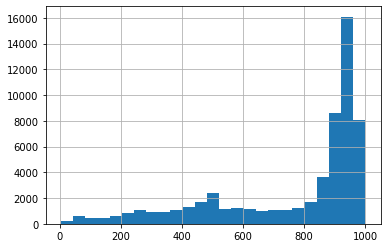

In [49]:
df_num.desc_len.hist(bins=25)

<AxesSubplot:>

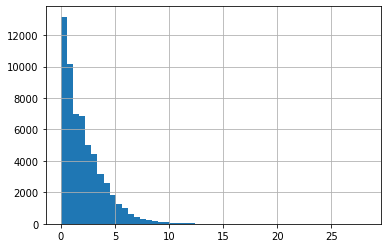

In [50]:
df_num.reviews_per_month.hist(bins=50)

#### I will take a gander at some boxplots of review scores, description length, beds, baths, and accomodates

In [51]:
reviews_df = df_num[['review_scores_rating', 'review_scores_accuracy', "review_scores_location",
                 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication']]

<AxesSubplot:>

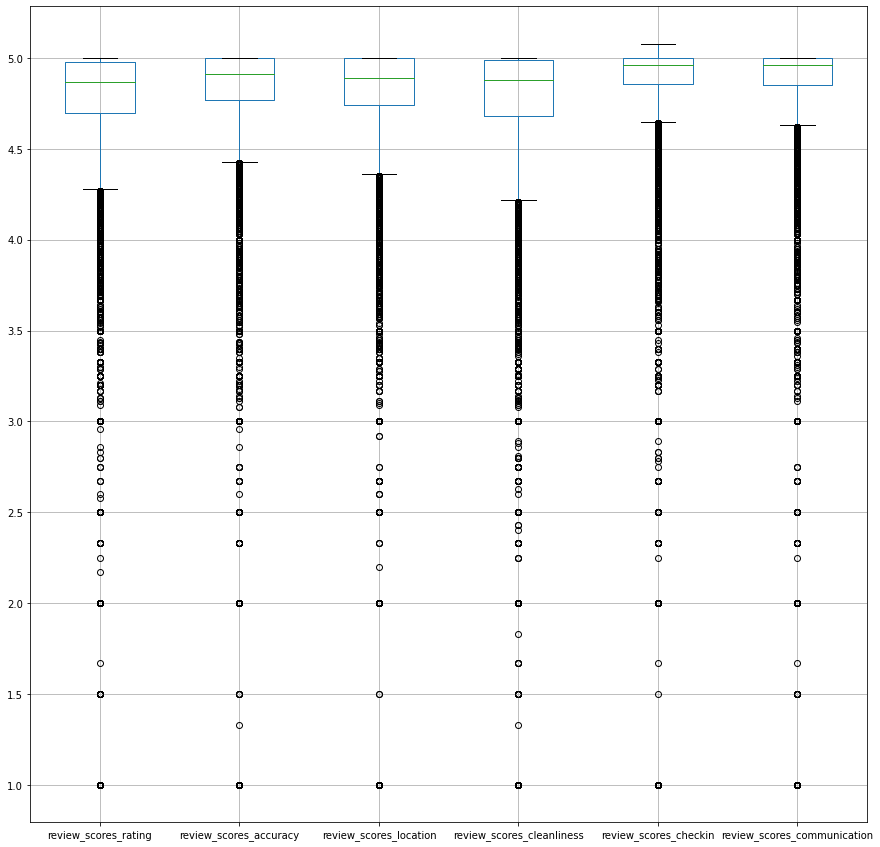

In [52]:
reviews_df.boxplot(figsize=(15,15))

<AxesSubplot:>

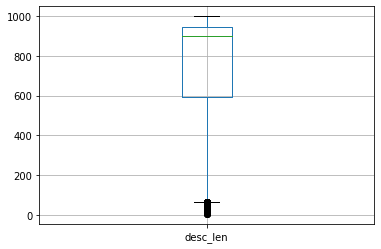

In [53]:
df_num.boxplot(column=['desc_len'])

<AxesSubplot:>

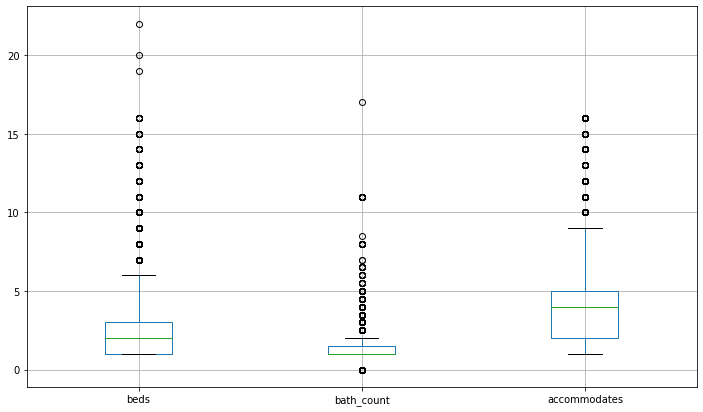

In [54]:
df_num.boxplot(column=['beds', 'bath_count', 'accommodates'], figsize=(12,7))

#### Now I will look into some possible correlations between the features using a heatmap

In [55]:
corr = df_num.corr()
corr

,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,nightly_price,desc_len,years_host,bath_count,superhost_tf,id_verified_tf,instant_book_tf
host_listings_count,1.000000,-0.013776,-0.011678,0.012348,-0.000526,0.003245,0.090041,0.063124,-0.016273,0.004813,0.020816,-0.076767,-0.075476,-0.062369,-0.100242,-0.073667,-0.046598,-0.106777,-0.124043,-0.037189,-0.115814,-0.087106,0.070438,0.072115,0.000089,0.031184,-0.111530,0.046273,0.127569
latitude,-0.013776,1.000000,0.198302,-0.090899,-0.060790,-0.078727,0.039306,-0.029694,0.033901,-0.005599,-0.048440,0.026875,-0.008201,-0.085298,0.002753,0.002260,-0.000602,0.003794,-0.000830,0.009819,-0.006443,-0.013075,-0.171844,0.038627,0.058700,-0.087750,0.019864,0.015553,-0.090183
longitude,-0.011678,0.198302,1.000000,-0.030483,-0.013332,-0.011680,-0.082485,-0.005978,0.079694,0.011866,-0.012319,-0.057658,-0.038512,-0.081795,-0.038217,-0.032230,-0.049039,-0.028624,-0.032392,-0.081166,-0.032067,-0.040052,-0.040342,-0.035335,-0.058433,-0.043585,-0.068982,-0.016203,-0.009836
accommodates,0.012348,-0.090899,-0.030483,1.000000,0.797097,0.828209,-0.126427,0.041926,0.050548,0.046931,0.039121,-0.021315,0.064380,0.084369,0.000112,-0.001644,0.008697,0.010253,0.015254,-0.042034,-0.005485,0.087463,0.573030,0.107228,-0.095712,0.507568,-0.014851,0.003270,0.116429
bedrooms,-0.000526,-0.060790,-0.013332,0.797097,1.000000,0.761694,-0.036730,0.039178,0.014538,0.007220,-0.000187,-0.069809,-0.011538,0.015026,0.011735,0.007887,0.006518,0.035299,0.024858,-0.048425,0.003721,-0.003106,0.530147,0.066167,-0.057211,0.568113,-0.006991,-0.016865,0.038304
beds,0.003245,-0.078727,-0.011680,0.828209,0.761694,1.000000,-0.088276,0.026649,0.050020,0.044146,0.035453,-0.025812,0.036186,0.051113,0.002991,0.001086,0.001998,0.019786,0.018873,-0.041311,0.002026,0.042065,0.486256,0.109044,-0.077933,0.507521,-0.002631,-0.010796,0.085974
minimum_nights,0.090041,0.039306,-0.082485,-0.126427,-0.036730,-0.088276,1.000000,0.159321,-0.186617,-0.159069,-0.129357,-0.182302,-0.370467,-0.359893,-0.057395,-0.061836,-0.095638,-0.032261,-0.063209,-0.028004,-0.107601,-0.398442,-0.143100,-0.027290,0.147914,-0.001469,-0.066500,0.001601,-0.139743
maximum_nights,0.063124,-0.029694,-0.005978,0.041926,0.039178,0.026649,0.159321,1.000000,-0.050902,-0.040475,-0.033928,-0.033530,-0.044459,-0.086447,-0.047296,-0.039291,-0.053195,-0.029391,-0.033314,-0.018370,-0.054921,-0.103700,0.020437,-0.002143,0.041432,0.029799,-0.041346,0.000318,0.027803
availability_30,-0.016273,0.033901,0.079694,0.050548,0.014538,0.050020,-0.186617,-0.050902,1.000000,0.891688,0.799244,-0.086867,-0.003618,0.010090,-0.126904,-0.122124,-0.090230,-0.112036,-0.110626,-0.119040,-0.117629,0.024728,0.052450,-0.066426,-0.195416,0.047481,-0.122230,-0.003785,0.080907
availability_60,0.004813,-0.005599,0.011866,0.046931,0.007220,0.044146,-0.159069,-0.040475,0.891688,1.000000,0.953881,-0.091495,-0.000517,0.023129,-0.132895,-0.124976,-0.093903,-0.112136,-0.111489,-0.120902,-0.128486,0.032590,0.040892,-0.059663,-0.201734,0.042186,-0.133583,-0.001641,0.083499


<AxesSubplot:>

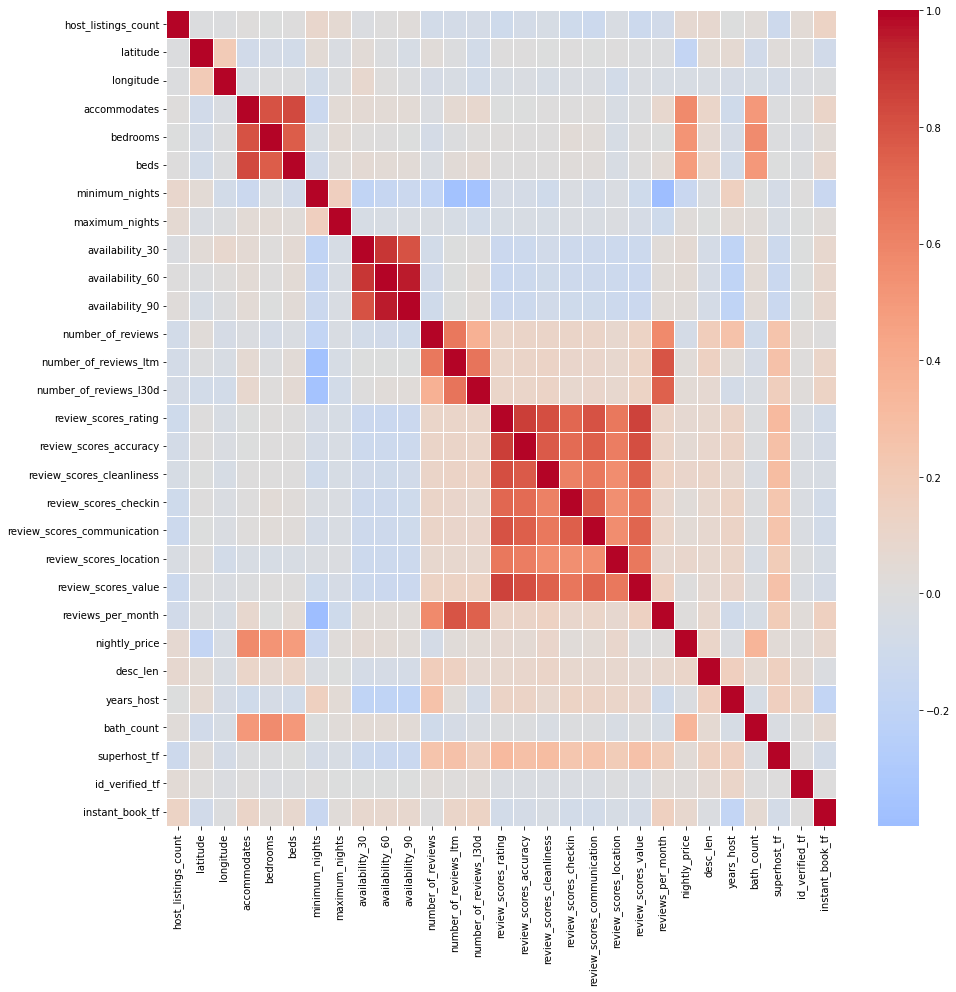

In [56]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, center=0, linewidths=0.5, cmap='coolwarm')

#### I will visualize a few reltationships via Scatterplots

<AxesSubplot:xlabel='nightly_price', ylabel='beds'>

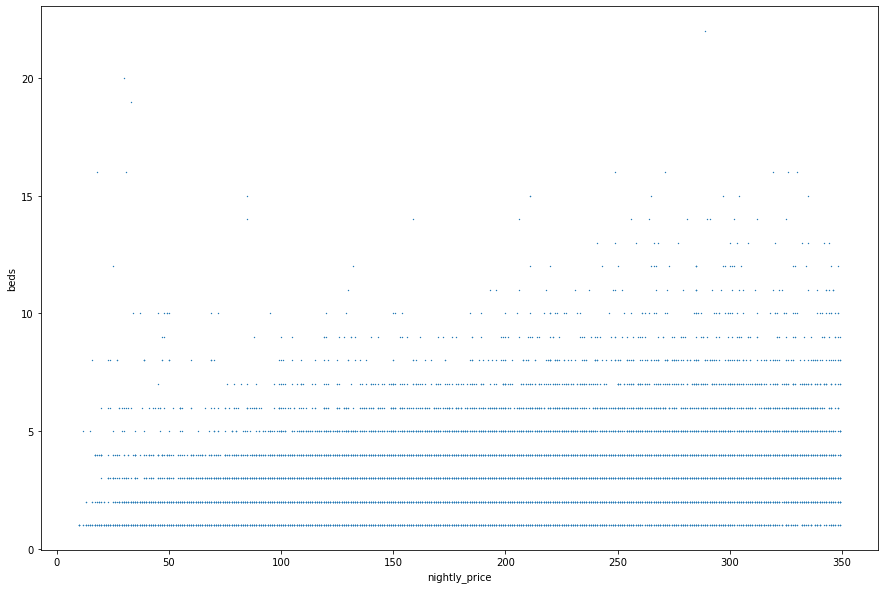

In [57]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_num, x="nightly_price", y="beds", s=2)

<AxesSubplot:xlabel='nightly_price', ylabel='desc_len'>

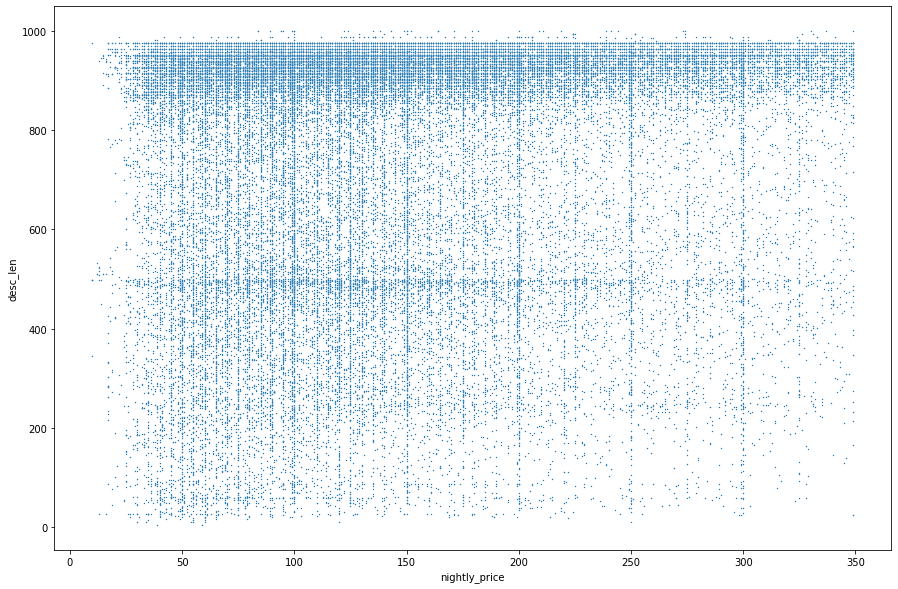

In [58]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_num, x="nightly_price", y="desc_len", s=2)

<AxesSubplot:xlabel='nightly_price', ylabel='bath_count'>

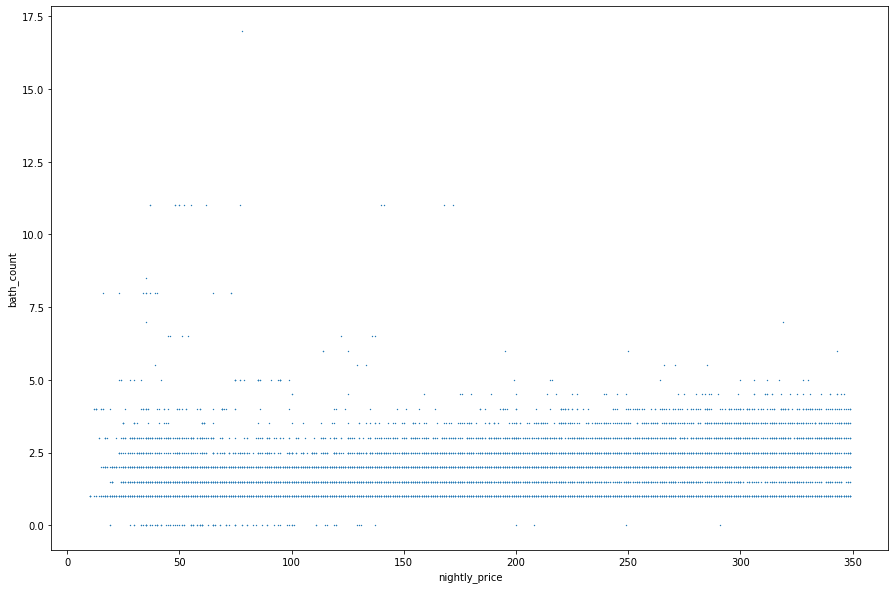

In [59]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_num, x="nightly_price", y="bath_count", s=2)

<AxesSubplot:xlabel='nightly_price', ylabel='bath_count'>

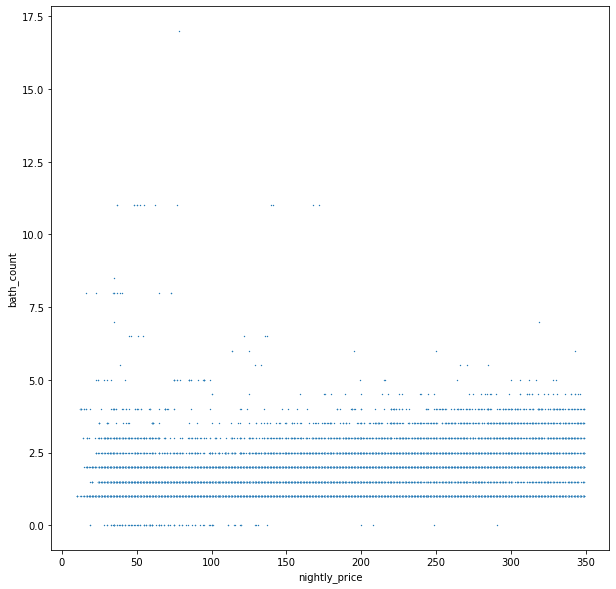

In [60]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_num, x="nightly_price", y="bath_count", s=2)

In [61]:
#create df for continuous data
df_cont = df_num[['nightly_price', 'accommodates', 'host_listings_count', 'bedrooms', 'beds',
                  'availability_30', 'availability_60', 'availability_90', 
                  'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 
                  'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 
                  'review_scores_checkin','review_scores_communication', 'review_scores_location',
                  'review_scores_value', 'reviews_per_month', 'nightly_price', 'desc_len',
                  'years_host', 'bath_count']]

df_cont = df_cont.reset_index()

In [62]:
df_pairplot = df_num[['nightly_price', 'bath_count', 'bedrooms', 'beds', 'desc_len', 'years_host']]

In [63]:
df_pairplot = df_pairplot.reset_index()

#### Create a pairplot of possibly interesting relationships

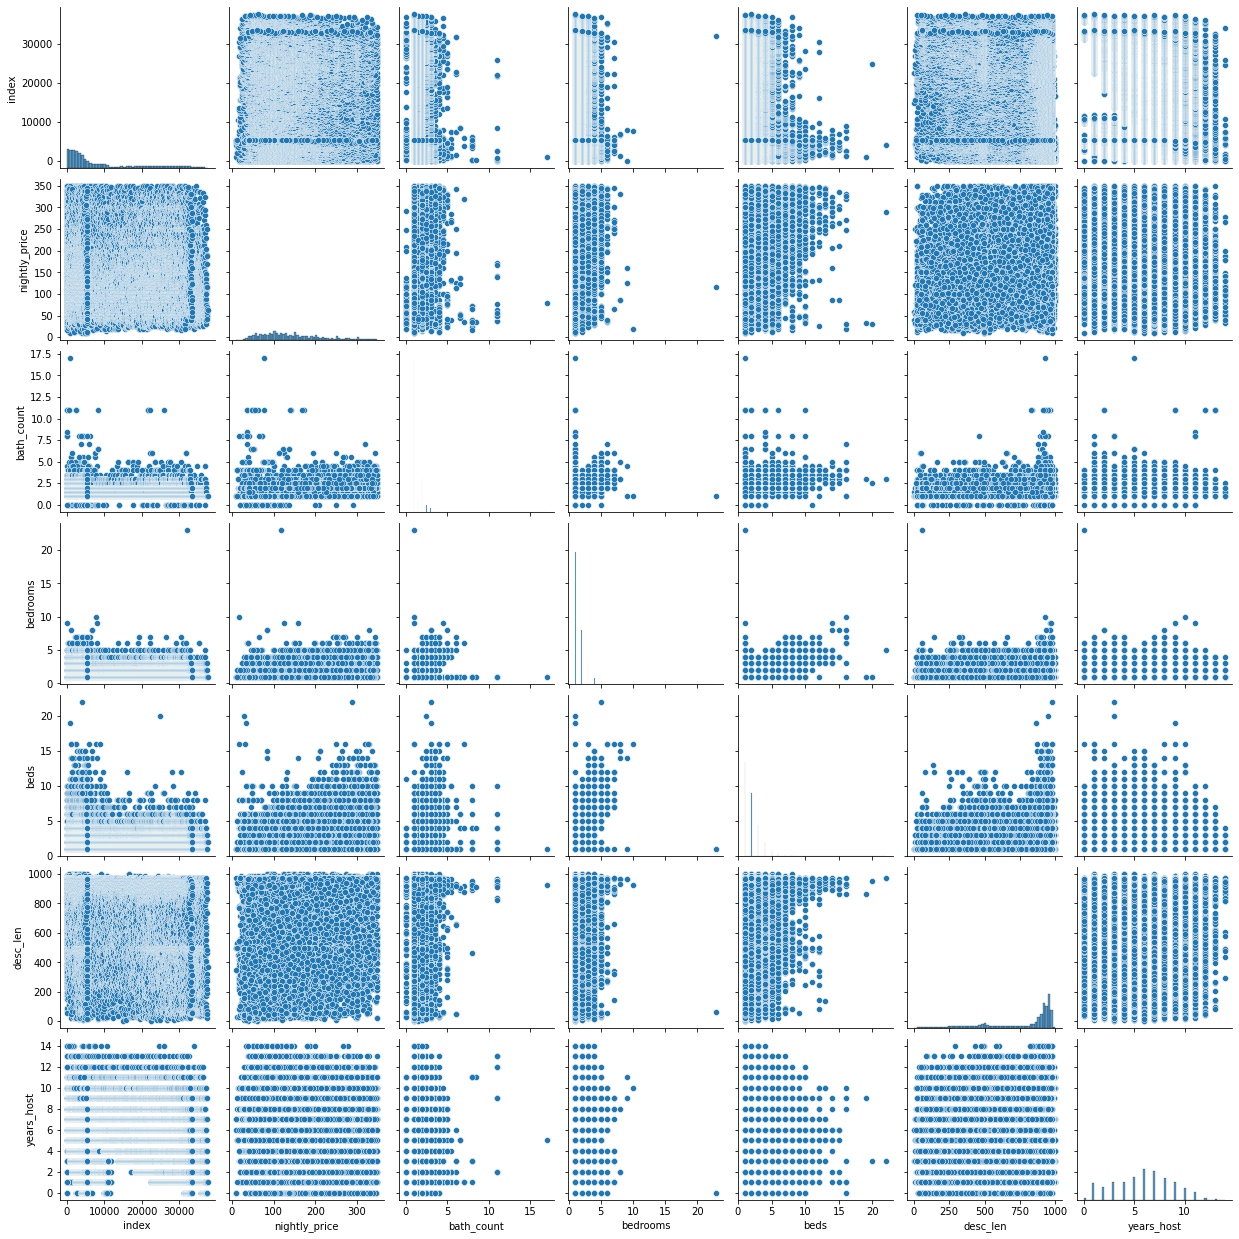

In [64]:
sns.pairplot(df_pairplot)

In [65]:
#create df for categorical data
df_cat.head()

,host_response_time,host_response_rate,host_acceptance_rate,room_type,city
0,within an hour,100%,94%,Entire home/apt,Austin
3,within an hour,100%,98%,Entire home/apt,Austin
4,within a day,83%,29%,Entire home/apt,Austin
5,within an hour,100%,95%,Entire home/apt,Austin
8,within an hour,100%,100%,Entire home/apt,Austin


### Categorical EDA

#### Create Pivot Tables for Cateogical Data

In [66]:
pd.pivot_table(df, index=['room_type'], 
               values=['nightly_price']).sort_values('nightly_price', ascending=False)

,nightly_price
room_type,
Hotel room,173.593458
Entire home/apt,170.273793
Private room,82.181579
Shared room,41.389273


In [67]:
pd.pivot_table(df, index=['host_response_time'], 
               values=['superhost_tf', 'instant_book_tf', 'nightly_price', 
                       'years_host']).sort_values('host_response_time', ascending=False)

,instant_book_tf,nightly_price,superhost_tf,years_host
host_response_time,,,,
within an hour,0.500855,149.572968,0.527644,5.650383
within a few hours,0.125048,135.702946,0.442944,6.678760
within a day,0.111813,135.971154,0.328297,6.703571
a few days or more,0.172481,132.660853,0.073643,5.986434


In [68]:
pd.pivot_table(df, index=['superhost_tf', 'room_type'], 
               values=['nightly_price', 'review_scores_rating', 
                       'host_listings_count', 'years_host']).sort_values('superhost_tf', ascending=False)

host_listings_count  nightly_price  \
superhost_tf room_type                                             
1            Entire home/apt             9.433200     170.832741   
             Hotel room                 16.446429     196.071429   
             Private room                9.445911      82.662554   
             Shared room                 7.065421      46.654206   
0            Entire home/apt            75.710448     169.677924   
             Hotel room                 16.493671     165.626582   
             Private room               23.705793      81.755716   
             Shared room                17.539278      40.193206   

                              review_scores_rating  years_host  
superhost_tf room_type                                          
1            Entire home/apt              4.885134    6.317689  
             Hotel room                   4.897679    6.250000  
             Private room                 4.874062    6.322238  
             Shared room                  4.842150    5.177570  
0            Entire home/apt              4.654014    5.478941  
             Hotel room                   4.490886    4.531646  
             Private room                 4.590415    5.196392  
             Shared room                  4.454119    5.288747

In [69]:
pd.pivot_table(df, index= 'room_type', columns='superhost_tf', 
               values='nightly_price', aggfunc='count')

superhost_tf,0,1
room_type,,
Entire home/apt,20846,22223
Hotel room,158,56
Private room,7872,6970
Shared room,471,107


### I will create some bar charts to further explore categorical data

<AxesSubplot:xlabel='room_type', ylabel='nightly_price'>

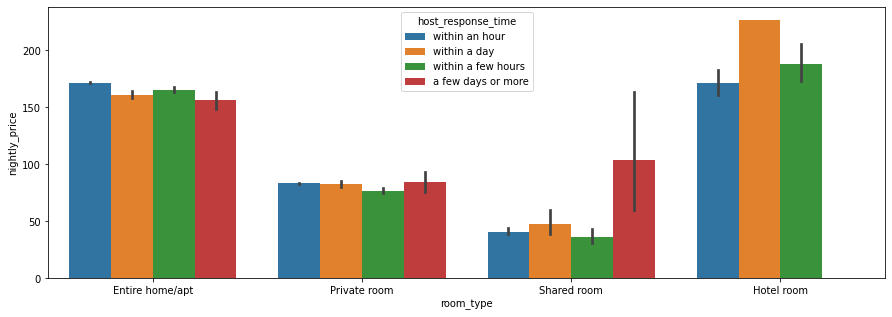

In [70]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, y='nightly_price', x='room_type', hue='host_response_time')

<AxesSubplot:xlabel='host_response_time', ylabel='reviews_per_month'>

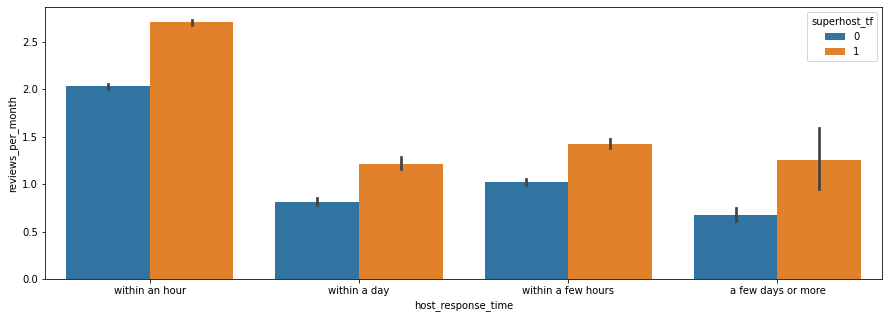

In [71]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, y='reviews_per_month', x='host_response_time', hue='superhost_tf')

<AxesSubplot:xlabel='superhost_tf', ylabel='nightly_price'>

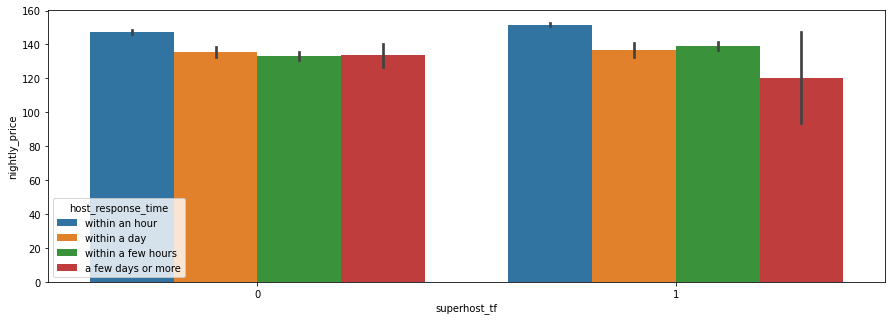

In [72]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, y='nightly_price', x='superhost_tf', hue='host_response_time')

# Model Building

In [73]:
## MODELS TO BUILD ##

#Multiple Linear Regression
#Lasso Regression
#SVM
#Decision Tree
#Random Forest
#Gradient Boosted Trees
#XGBoost

#### After EDA I have discovered columns that need to be dropped like 'city' as well as overly correlated features like review data

In [74]:
df.shape

(58703, 34)

In [75]:
df.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'nightly_price', 'desc_len',
       'years_host', 'bath_count', 'city', 'superhost_tf', 'id_verified_tf',
       'instant_book_tf'],
      dtype='object')

In [76]:
ml_df = df[['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'latitude', 'longitude', 'room_type',
        'beds', 'minimum_nights', 'maximum_nights','availability_30',
       'review_scores_rating', 'reviews_per_month', 'nightly_price', 'desc_len',
       'years_host', 'bath_count', 'superhost_tf', 'id_verified_tf',
       'instant_book_tf']]

In [77]:
ml_df.shape

(58703, 20)

<AxesSubplot:>

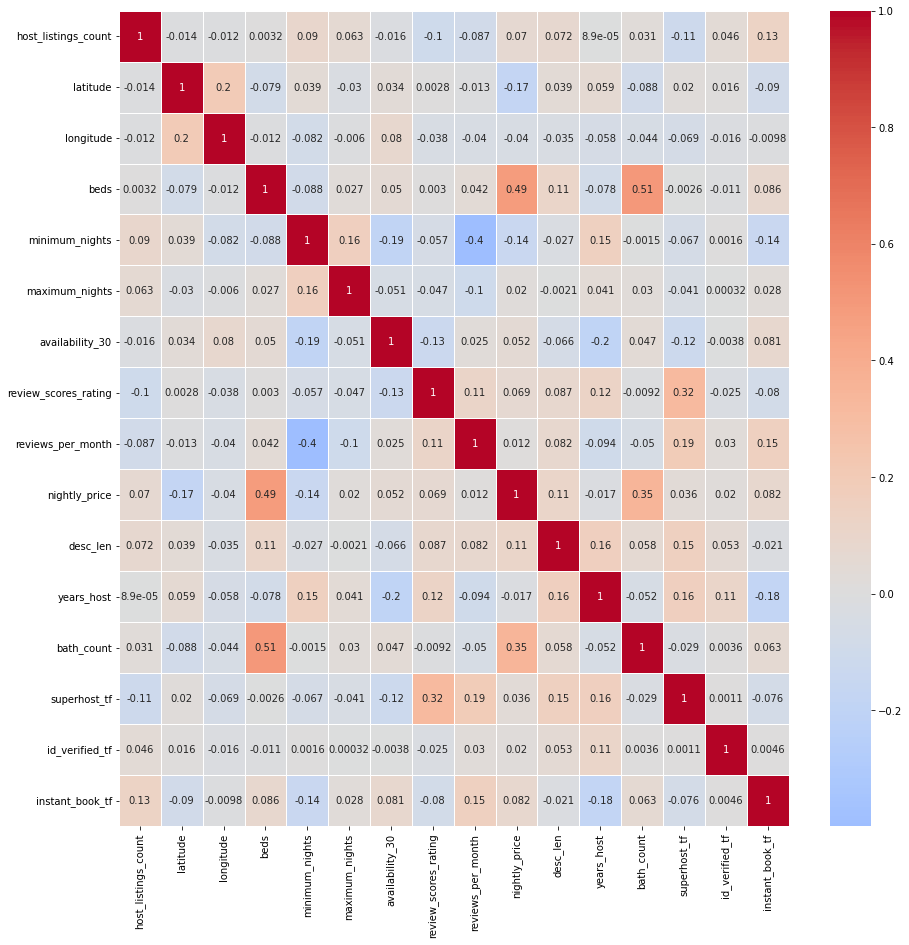

In [78]:
corr2 = ml_df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr2, center=0, linewidths=0.5, cmap='coolwarm', annot=True)

### One Hot Encode Appropriate data for ML modeling

#### One Hot Encode some of the categorical variables (host_response_time, host_acceptance_rate, host_response_rate, room_type)

In [79]:
ml_df.shape

(58703, 20)

In [80]:
#I will drop any na values
ml_df = ml_df.dropna(subset=['host_response_time'])
ml_df = ml_df.dropna(subset=['host_acceptance_rate'])
ml_df = ml_df.dropna(subset=['host_response_rate'])
ml_df = ml_df.dropna(subset=['room_type'])

#make sure above code worked
(ml_df['host_response_time'].isna().sum(), ml_df['host_acceptance_rate'].isna().sum(), 
 ml_df['host_response_rate'].isna().sum(), ml_df['room_type'].isna().sum())

(0, 0, 0, 0)

In [81]:
(ml_df['room_type'].value_counts(), ml_df['host_response_time'].value_counts())

(Entire home/apt    43069
 Private room       14842
 Shared room          578
 Hotel room           214
 Name: room_type, dtype: int64,
 within an hour        46774
 within a few hours     7773
 within a day           3640
 a few days or more      516
 Name: host_response_time, dtype: int64)

In [82]:
#create new columns by removing percent symbol
ml_df['host_response'] = ml_df['host_response_rate'].apply(lambda x: x.split('%')[0])
ml_df['host_acceptance'] = ml_df['host_acceptance_rate'].apply(lambda x: x.split('%')[0])

In [83]:
#turn dtypes into integers
ml_df['host_response'] = ml_df['host_response'].astype(int)
ml_df['host_acceptance'] = ml_df['host_acceptance'].astype(int)

In [84]:
#I will now bin both response rate and acceptance rate for hosts
bins = [0, 75, 85, 90, 95, 97, 99, 100]
ml_df['binned_host_response'] = pd.cut(ml_df['host_response'], bins, labels=False)

bins2 = [0, 60, 80, 90, 95, 97, 99, 100]
ml_df['binned_host_acceptance'] = pd.cut(ml_df['host_acceptance'], bins2, labels=False)

In [85]:
#drop na values from newly created columns
ml_df = ml_df.dropna(subset=['binned_host_acceptance'])
ml_df = ml_df.dropna(subset=['binned_host_response'])

In [86]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

ohe_df = pd.DataFrame(ohe.fit_transform(ml_df[['room_type', 'host_response_time', 
                                            'binned_host_response', 'binned_host_acceptance']]).toarray())

In [87]:
#rename columns names appropriately
ohe_df.columns = ohe.get_feature_names_out()

In [88]:
#Join newly create encoded columns back to the original dataframe and drop old columns
ml_df = ml_df.join(ohe_df)

In [89]:
ml_df.head(1)

,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,room_type,beds,minimum_nights,maximum_nights,availability_30,review_scores_rating,reviews_per_month,nightly_price,desc_len,years_host,bath_count,superhost_tf,id_verified_tf,instant_book_tf,host_response,host_acceptance,binned_host_response,binned_host_acceptance,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,binned_host_response_1.0,binned_host_response_2.0,binned_host_response_3.0,binned_host_response_4.0,binned_host_response_5.0,binned_host_response_6.0,binned_host_acceptance_1.0,binned_host_acceptance_2.0,binned_host_acceptance_3.0,binned_host_acceptance_4.0,binned_host_acceptance_5.0,binned_host_acceptance_6.0
0,within an hour,100%,94%,1.0,30.26057,-97.73441,Entire home/apt,2.0,2,90,7,4.83,3.69,240,933,13,1.0,1,1,0,100,94,6.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [90]:
#drop any columns that aren't numeric
ml_df = ml_df.drop(['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'room_type', 
                    'binned_host_response','binned_host_acceptance', 'host_response', 'host_acceptance'], axis=1)

In [91]:
ml_df.shape

(58436, 34)

In [92]:
ml_df.dtypes

host_listings_count                      float64
latitude                                 float64
longitude                                float64
beds                                     float64
minimum_nights                             int64
maximum_nights                             int64
availability_30                            int64
review_scores_rating                     float64
reviews_per_month                        float64
nightly_price                              int64
desc_len                                   int64
years_host                                 int64
bath_count                               float64
superhost_tf                               int64
id_verified_tf                             int64
instant_book_tf                            int64
room_type_Hotel room                     float64
room_type_Private room                   float64
room_type_Shared room                    float64
host_response_time_within a day          float64
host_response_time_w

In [93]:
#Export final df to csv file to use within model deployment
ml_df.to_csv('final_df.csv')

### Train Test Split the data

In [94]:
from sklearn.model_selection import train_test_split

X = ml_df.drop('nightly_price', axis=1)
y = ml_df['nightly_price'].values

In [95]:
X.shape, y.shape

((58436, 33), (58436,))

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46748, 33), (11688, 33), (46748,), (11688,))

### I will now normalize X data for Linear Regression

In [290]:
from sklearn import preprocessing
#create normalized X data for Linear Regression model
scaler = preprocessing.MinMaxScaler()
X_norm = scaler.fit_transform(X)

X_norm_train = scaler.fit_transform(X_train)
X_norm_test = scaler.transform(X_test)

In [220]:
#create normalized df's
X_norm_train = pd.DataFrame(X_norm_train, columns=X.columns)
X_norm_test = pd.DataFrame(X_norm_test, columns=X.columns)

#### Import ML models and other packages

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn import svm




import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import mean_squared_error

### Multiple Linear Regression

In [99]:
lr = LinearRegression()
lr_norm_reg = lr.fit(X_norm_train, y_train)

NameError: name 'X_norm_train' is not defined

In [223]:
pred_norm_reg = lr.predict(X_norm_test)
mse_norm_reg = mean_squared_error(y_test, pred_norm_reg)

#Calculate RMSE
lin_rmse = np.sqrt(mse_norm_reg)


print('RMSE = %s' % (lin_rmse))

RMSE = 64.76150737388369


In [224]:
#take a look at some features and their respective p-values
from statsmodels.api import OLS
stats = OLS(y_train, X_norm_train).fit()
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              7824.
Date:                Tue, 21 Jun 2022   Prob (F-statistic):                        0.00
Time:                        17:31:54   Log-Likelihood:                     -2.6147e+05
No. Observations:               46748   AIC:                                  5.230e+05
Df Residuals:                   46715   BIC:                                  5.233e+05
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
host_listings_count                     195.8061     10.833     18.075      0.000     174.573     217.039
latitude                                -33.7672      1.128    -29.936      0.000     -35.978     -31.556
longitude                                -1.5768      0.876     -1.800      0.072      -3.294       0.140
beds                                    450.8884      5.268     85.589      0.000     440.563     461.214
minimum_nights                          -32.0759      1.131    -28.369      0.000     -34.292     -29.860
maximum_nights                           27.8222      6.112      4.552      0.000      15.844      39.801
availability_30                           7.8128      0.978      7.990      0.000       5.896       9.729
review_scores_rating                     68.8322      2.844     24.205      0.000      63.259      74.406
reviews_per_month                       -66.9857      4.931    -13.583      0.000     -76.651     -57.320
desc_len                                 15.4614      1.234     12.532      0.000      13.043      17.880
years_host                               10.2049      1.580      6.460      0.000       7.109      13.301
bath_count                              290.5664      9.724     29.882      0.000     271.508     309.625
superhost_tf                              3.5939      0.655      5.489      0.000       2.311       4.877
id_verified_tf                            5.4390      0.843      6.450      0.000       3.786       7.092
instant_book_tf                           3.7720      0.637      5.920      0.000       2.523       5.021
room_type_Hotel room                     -4.1220      5.358     -0.769      0.442     -14.623       6.379
room_type_Private room                    1.2846      0.724      1.774      0.076      -0.134       2.703
room_type_Shared room                     0.6480      3.239      0.200      0.841      -5.700       6.996
host_response_time_within a day          28.7181      3.671      7.823      0.000      21.523      35.914
host_response_time_within a few hours    30.8115      3.852      8.000      0.000      23.262      38.361
host_response_time_within an hour        29.5954      3.847      7.693      0.000      22.055      37.136
binned_host_response_1.0                  2.5211      3.095      0.815      0.415      -3.545       8.587
binned_host_response_2.0                  0.5205      2.841      0.183      0.855      -5.048       6.089
binned_host_response_3.0                  2.2389      2.898      0.773      0.440      -3.441       7.918
binned_host_response_4.0                 -2.2732      3.041     -0.748      0.455      -8.234       3.687
binned_host_resp

### Lasso Regression

In [100]:
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [105]:
X_test.columns

Index(['host_listings_count', 'latitude', 'longitude', 'beds',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'review_scores_rating', 'reviews_per_month', 'desc_len', 'years_host',
       'bath_count', 'superhost_tf', 'id_verified_tf', 'instant_book_tf',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'binned_host_response_1.0',
       'binned_host_response_2.0', 'binned_host_response_3.0',
       'binned_host_response_4.0', 'binned_host_response_5.0',
       'binned_host_response_6.0', 'binned_host_acceptance_1.0',
       'binned_host_acceptance_2.0', 'binned_host_acceptance_3.0',
       'binned_host_acceptance_4.0', 'binned_host_acceptance_5.0',
       'binned_host_acceptance_6.0'],
      dtype='object')

In [128]:
a = X_test.values[1]
a = a.reshape(-1)

a.shape

(33,)

In [133]:
lasso_reg = lasso.predict([[3.     ,  35.58473, -82.60814,   1.     ,   1.     ,   5.     ,
        10.     ,   4.82   ,   2.93   , 913.     ,   6.     ,   1.     ,
         1.     ,   1.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   1.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   1.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   1.]])
lasso_reg[0]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


127.09875776709976

In [292]:
lasso_reg = lasso.predict(X_test)
mse_lasso_reg = mean_squared_error(y_test, lasso_reg)

#Calculate RMSE
lasso_rmse = np.sqrt(mse_lasso_reg)


print('RMSE = %s' % (lasso_rmse))

RMSE = 64.9081945698765


### SVR (Supper Vector Regression)

In [293]:
svr = svm.SVR()
svr.fit(X_train, y_train)

SVR()

In [294]:
svr_reg = svr.predict(X_test)
mse_svr_reg = mean_squared_error(y_test, svr_reg)

#Calculate RMSE
svr_rmse = np.sqrt(mse_svr_reg)


print('RMSE = %s' % (svr_rmse))

RMSE = 77.72001690569263


### Decision Tree

In [295]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [296]:
dt_reg = dt.predict(X_test)
mse_dt_reg = mean_squared_error(y_test, dt_reg)

#Calculate RMSE
dt_rmse = np.sqrt(mse_dt_reg)

print('RMSE = %s' % (dt_rmse))

RMSE = 70.23582367600564


### Random Forest

In [297]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [298]:
rf_reg = rf.predict(X_test)
mse_rf_reg = mean_squared_error(y_test, rf_reg)

#Calculate RMSE
rf_rmse = np.sqrt(mse_rf_reg)

print('RMSE = %s' % (rf_rmse))

RMSE = 49.198382717881074


### Gradient Boosted Trees

In [299]:
gbt = GradientBoostingRegressor()
gbt.fit(X_train, y_train)

GradientBoostingRegressor()

In [300]:
gbt_reg = gbt.predict(X_test)
mse_gbt_reg = mean_squared_error(y_test, gbt_reg)

#Calculate RMSE
gbt_rmse = np.sqrt(mse_gbt_reg)

print('RMSE = %s' % (gbt_rmse))

RMSE = 55.41101068750439


### SGD Regressor

In [305]:
sgd = SGDRegressor()
sgd.fit(X_norm_train, y_train)

SGDRegressor()

In [306]:
sgd_reg = sgd.predict(X_norm_test)
mse_sgd_reg = mean_squared_error(y_test, sgd_reg)

#Calculate RMSE
sgd_rmse = np.sqrt(mse_sgd_reg)

print('RMSE = %s' % (sgd_rmse))

RMSE = 64.88369229918962


### XGBoost

In [303]:
xg = XGBRegressor()
xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [304]:
xg_reg = xg.predict(X_test)
mse_xg_reg = mean_squared_error(y_test, xg_reg)

#Calculate RMSE
xg_rmse = np.sqrt(mse_xg_reg)

print('RMSE = %s' % (xg_rmse))

RMSE = 49.612384002335126


### I will now fine tune 3 of the best performing models (Random Forest, Gradient Boosted Trees, <br> XGBoost

In [246]:
#import GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#### Random Forest Grid Search

In [314]:
rf_param_grid = [{'max_depth':[50, 75, 100], 
               'min_samples_split': [2], 'min_samples_leaf': [2]}]

rf_grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42),rf_param_grid, cv=2)
rf_grid_search_cv.fit(X_train, y_train)
rf_grid_search_cv.best_params_

{'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [330]:
rf = RandomForestRegressor(max_depth=50, n_estimators=530, min_samples_leaf=2, min_samples_split=2)
rf.fit(X_train, y_train)

rf_reg = rf.predict(X_test)
mse_rf_reg = mean_squared_error(y_test, rf_reg)

#Calculate RMSE
rf_rmse = np.sqrt(mse_rf_reg)

print('RMSE = %s' % (rf_rmse))

RMSE = 48.96960552248767


#### Gradient Boosted Grid Search

In [327]:
gb_param_grid = [{'learning_rate': [0.11], 'max_depth': [20],
              'min_samples_split': [5], 'min_samples_leaf': [24]
             }]

gb_grid_search_cv = GridSearchCV(GradientBoostingRegressor(random_state=42),gb_param_grid, cv=2)
gb_grid_search_cv.fit(X_train, y_train)
gb_grid_search_cv.best_params_

{'learning_rate': 0.11,
 'max_depth': 20,
 'min_samples_leaf': 24,
 'min_samples_split': 5}

In [329]:
gbt = GradientBoostingRegressor(learning_rate=0.11, max_depth=20, n_estimators=1100, min_samples_split=5, 
                               min_samples_leaf=24)
gbt.fit(X_train, y_train)

gbt_reg = gbt.predict(X_test)
mse_gbt_reg = mean_squared_error(y_test, gbt_reg)

#Calculate RMSE
gbt_rmse = np.sqrt(mse_gbt_reg)

print('RMSE = %s' % (gbt_rmse))

RMSE = 48.63356601351448


#### XGBoost Grid Search

In [311]:
xg_param_grid = [{'learning_rate': [0.01] ,'max_depth': [10], 'min_child_weight': [1],
              'gamma': [0.4], 'colsample_bytree': [0.7]}]
xgb_reg = GridSearchCV(XGBRegressor(random_state=42), xg_param_grid, cv=3)
xgb_reg.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_o...e,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=Non

In [312]:
xgb_reg.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 1}

In [337]:
xg = XGBRegressor(learning_rate=0.1, max_depth=10, n_estimators=730, min_child_weight=1, gamma=0.4,
                 colsample_bytree=0.7)

xg.fit(X_train, y_train)

xg_reg = xg.predict(X_test)
mse_xg_reg = mean_squared_error(y_test, xg_reg)

#Calculate RMSE
xg_rmse = np.sqrt(mse_xg_reg)

print('RMSE = %s' % (xg_rmse))

RMSE = 47.27857163060879


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

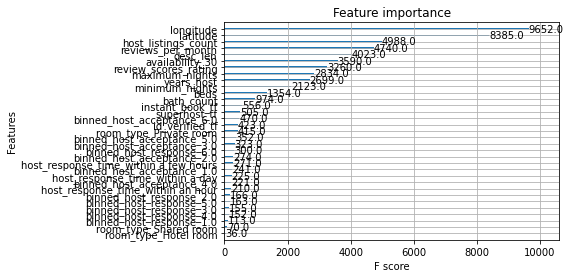

In [342]:
from xgboost import plot_importance
plot_importance(xgb_reg.best_estimator_)

# Create an Ensemble of top 3 performing models from above

In [332]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

In [333]:
ens_vr = VotingRegressor([('rf', rf), ('gbt', gbt), ('xg', xg)])
vr = ens_vr.fit(X_train, y_train)

In [334]:
vr_reg = vr.predict(X_test)
mse_vr_reg = mean_squared_error(y_test, vr_reg)

#Calculate RMSE
vr_rmse = np.sqrt(mse_vr_reg)

print('RMSE = %s' % (vr_rmse))

RMSE = 47.144446871045865


In [344]:
ens_stack = StackingRegressor(estimators=[('rf', rf), ('gbt', gbt), ('xg', xg)],
                              final_estimator=LinearRegression())

stack = ens_stack.fit(X_train, y_train)

In [345]:
stack_reg = ens_stack.predict(X_test)
mse_stack_reg = mean_squared_error(y_test, stack_reg)

#Calculate RMSE
stack_rmse = np.sqrt(mse_stack_reg)

print('RMSE = %s' % (stack_rmse))

RMSE = 46.88358354676266


In [352]:
#save my final model from the Stacking Regressor Ensemble
final_model = ens_stack

### Import Pickle

In [347]:
import pickle

In [349]:
pickle.dump(final_model, open('final_model.pkl', 'wb'))

In [350]:
pickled_model = pickle.load(open('final_model.pkl', 'rb'))
pickled_model.predict(X_test)

array([ 98.31493018,  54.16710673, 141.91946125, ...,  61.1593813 ,
       210.6631625 , 144.67362655])

In [355]:
X_train.columns

Index(['host_listings_count', 'latitude', 'longitude', 'beds',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'review_scores_rating', 'reviews_per_month', 'desc_len', 'years_host',
       'bath_count', 'superhost_tf', 'id_verified_tf', 'instant_book_tf',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'binned_host_response_1.0',
       'binned_host_response_2.0', 'binned_host_response_3.0',
       'binned_host_response_4.0', 'binned_host_response_5.0',
       'binned_host_response_6.0', 'binned_host_acceptance_1.0',
       'binned_host_acceptance_2.0', 'binned_host_acceptance_3.0',
       'binned_host_acceptance_4.0', 'binned_host_acceptance_5.0',
       'binned_host_acceptance_6.0'],
      dtype='object')

In [354]:
X_train.columns
()

,host_listings_count,latitude,longitude,beds,minimum_nights,maximum_nights,availability_30,review_scores_rating,reviews_per_month,desc_len,years_host,bath_count,superhost_tf,id_verified_tf,instant_book_tf,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,binned_host_response_1.0,binned_host_response_2.0,binned_host_response_3.0,binned_host_response_4.0,binned_host_response_5.0,binned_host_response_6.0,binned_host_acceptance_1.0,binned_host_acceptance_2.0,binned_host_acceptance_3.0,binned_host_acceptance_4.0,binned_host_acceptance_5.0,binned_host_acceptance_6.0
4981,19.0,36.141796,-86.76860,1.0,2,13,11,4.97,4.24,945,8,2.0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
860,2.0,45.581780,-122.74083,1.0,2,14,30,4.65,2.84,919,9,1.0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4185,10.0,39.651010,-104.91330,3.0,2,365,17,5.00,1.00,843,6,2.5,1,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9773,464.0,32.747170,-117.22803,2.0,30,1125,0,5.00,0.54,933,5,1.0,0,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17391,2.0,40.690680,-73.92664,1.0,3,1125,1,4.89,1.22,659,8,1.0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
